In [1]:
## import necessary libraries
import pandas as pd   # For data manipulation and analysis
import numpy as np    # For numerical computations
import matplotlib.pyplot as plt     # For plotting graphs
from sklearn.cluster import KMeans   # For KMeans clustering algorithm

## Load the Dataset

In [2]:
# Read the CSV file 'Mall_Customers.csv' into a pandas DataFrame
data = pd.read_csv('Mall_Customers.csv')
# Display the first few rows of the dataset
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Make another dataframe of column 3 & 4

In [3]:
# Extract columns 3 and 4 from the DataFrame 'data'
df = data.iloc[:, [3, 4]]
# Display the first few rows of the new DataFrame 'df'
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [4]:
# Check shape of dataframe
df.shape

(200, 2)

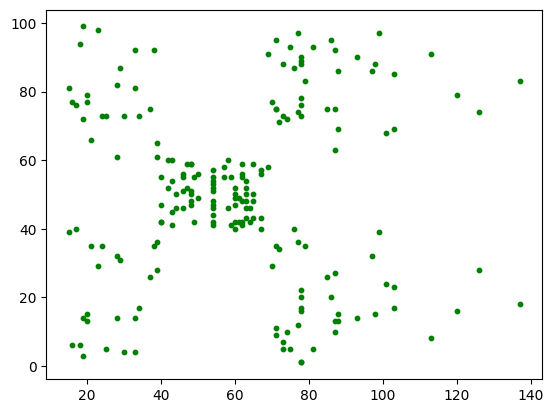

In [5]:
#4Create a scatter plot for df
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c='green', s=10)


## KMeans Clustering using Elbow Method

D:\plant_pathology\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\plant_pathology\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\plant_pathology\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\plant_pathology\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

[269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.839349156595, 21862.09267218289, 19672.07284901432]


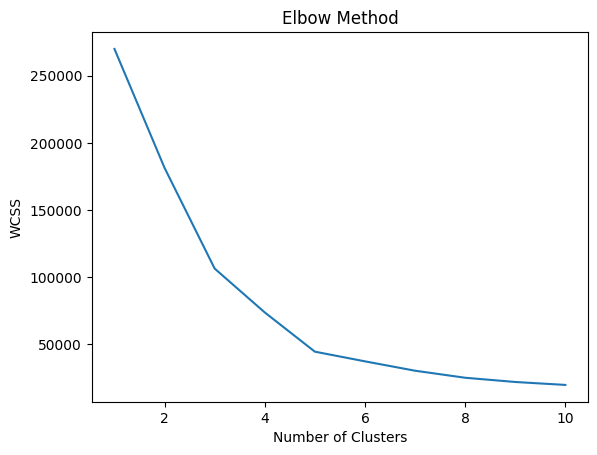

In [6]:
# Initialize an empty list to store the WCSS values
wcss = []
# Iterate over a range of cluster numbers from 1 to 10
for i in range(1, 11):
    # Create a KMeans object with 'i' clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
     # Fit the KMeans model to the data
    kmeans.fit(df)
     # Append the WCSS value to the list
    wcss.append(kmeans.inertia_)
print(wcss) 
# Plot the number of clusters against the corresponding WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show() 

## KMeans Clustering with Specified Clusters


In [7]:
# Create a KMeans object with 5 clusters using k-means++ initialization
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
# Fit the KMeans model to the data and predict cluster labels for each da
labels = kmeans.fit_predict(df)

D:\plant_pathology\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
# Find the unique cluster labels
unique_labels = np.unique(labels)
unique_labels 

array([0, 1, 2, 3, 4])

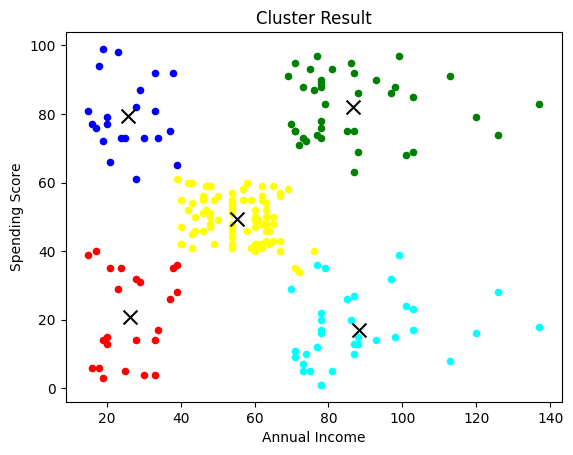

In [9]:
# Scatter plot for points in cluster 0
plt.scatter(df.iloc[labels==0, 0], df.iloc[labels==0, 1], s=20, c='red')
# Scatter plot for points in cluster 1
plt.scatter(df.iloc[labels==1, 0], df.iloc[labels==1, 1], s=20, c='green')
# Scatter plot for points in cluster 2
plt.scatter(df.iloc[labels==2, 0], df.iloc[labels==2, 1], s=20, c='blue')
# Scatter plot for points in cluster 3
plt.scatter(df.iloc[labels==3, 0], df.iloc[labels==3, 1], s=20, c='yellow')
# Scatter plot for points in cluster 4
plt.scatter(df.iloc[labels==4, 0], df.iloc[labels==4, 1], s=20, c='cyan')
# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', marker='x', label='Centroids')

# Set plot title and labels
plt.title('Cluster Result')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
# Show the plot
plt.show()


## DBSCAN Clustering Algorithm


## Importing Libraries


In [10]:
import numpy as np # For numerical computations
import pandas as pd # For data manipulation and analysis
import matplotlib.pyplot as plt # For plotting graphs
from sklearn.cluster import KMeans # For KMeans clustering
from sklearn.cluster import DBSCAN # For DBSCAN clustering

In [11]:
# Read the CSV file 'Mall_Customers.csv' into a pandas DataFrame
data = pd.read_csv('Mall_Customers.csv')
# Display the first few rows of the dataset
data.head() 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
# Check the shape of the DataFrame 'data'
data.shape

(200, 5)

In [60]:
# Extract columns 3 and 4 from the DataFrame 'data' 
df = data.iloc[:, [3, 4]].values
# Display the resulting NumPy array
df

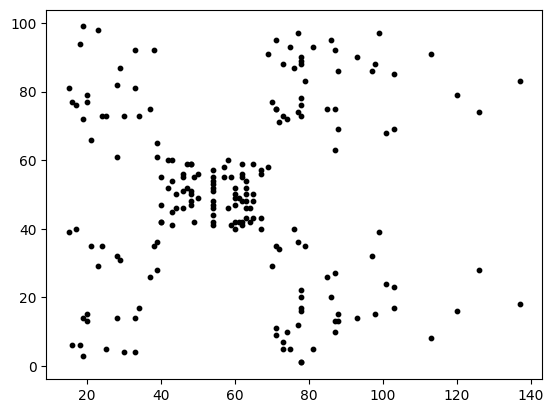

In [14]:
# Create a scatter plot of the data points
plt.scatter(df[:, 0], df[:, 1], s=10, c='black')
# Display the plot
plt.show()

## Using Elbow Method for finding Optimal Clusters

D:\plant_pathology\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\plant_pathology\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\plant_pathology\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\plant_pathology\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

[269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.839349156595, 21862.09267218289, 19672.07284901432]


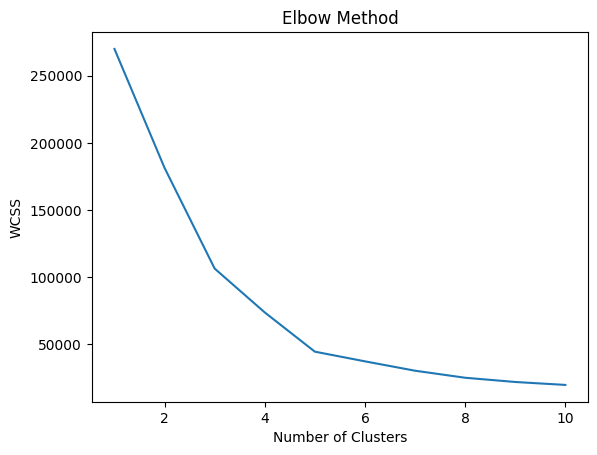

In [15]:
# Initialize an empty list to store the WCSS values
wcss = []
# Iterate over a range of cluster numbers from 1 to 10
for i in range(1, 11):
    # Create a KMeans object with 'i' clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
     # Fit the KMeans model to the data
    kmeans.fit(df)
     # Append the WCSS value to the list
    wcss.append(kmeans.inertia_)
print(wcss) 
# Plot the number of clusters against the corresponding WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show() 

## DBSCAN Clustering

In [16]:
# Initialize DBSCAN clustering algorithm with specified parameters
dbscan = DBSCAN(eps=5, min_samples=5)

In [17]:
# Fit the DataFrame to DBSCAN Model
labels = dbscan.fit_predict(df)

In [18]:
# Calculate the unique cluster labels
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

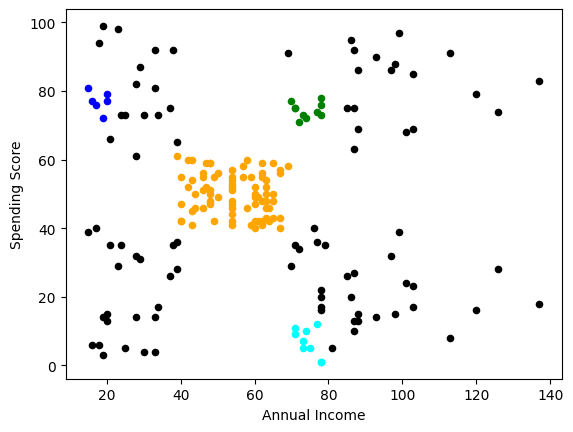

In [19]:
# Scatter plot for points classified as noise (label = -1)
plt.scatter(df[labels == -1, 0], df[labels == -1, 1], s=20, c='black')
# Scatter plot for points in cluster 0
plt.scatter(df[labels == 0, 0], df[labels == 0, 1], s=20, c='blue')
# Scatter plot for points in cluster 1
plt.scatter(df[labels == 1, 0], df[labels == 1, 1], s=20, c='orange')
# Scatter plot for points in cluster 2
plt.scatter(df[labels == 2, 0], df[labels == 2, 1], s=20, c='green')
# Scatter plot for points in cluster 3
plt.scatter(df[labels == 3, 0], df[labels == 3, 1], s=20, c='cyan')
# Set the labels for x and y axes
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
# Display the plot
plt.show()

## DBSCAN clusters the data points which are dense or close to each other.

## Hierarchical Clustering Algorithm

## Importing Libraries

In [20]:
import pandas as pd # For data manipulation
import numpy as np # For numerical computations
import matplotlib.pyplot as plt # For plotting graphs
%matplotlib inline
import scipy.cluster.hierarchy as sch # For hierarchical clustering
from sklearn.cluster import AgglomerativeClustering # For agglomerative 
from sklearn.metrics import silhouette_score # For silhouette sco
from sklearn.preprocessing import normalize # For data normalizat
from sklearn.cluster import KMeans # For KMeans cluster
import warnings
warnings.filterwarnings('ignore') # Ignore warnings

## Load the Dataset

In [21]:
# Read the CSV file 'Mall_Customers.csv' into a pandas DataFrame
data = pd.read_csv('Mall_Customers.csv')
# Display the first few rows of the dataset
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
# Select columns 'Age' and 'Annual Income (k$)' from the DataFrame 'data'
df = data.loc[:, ['Age', 'Annual Income (k$)']]
df

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


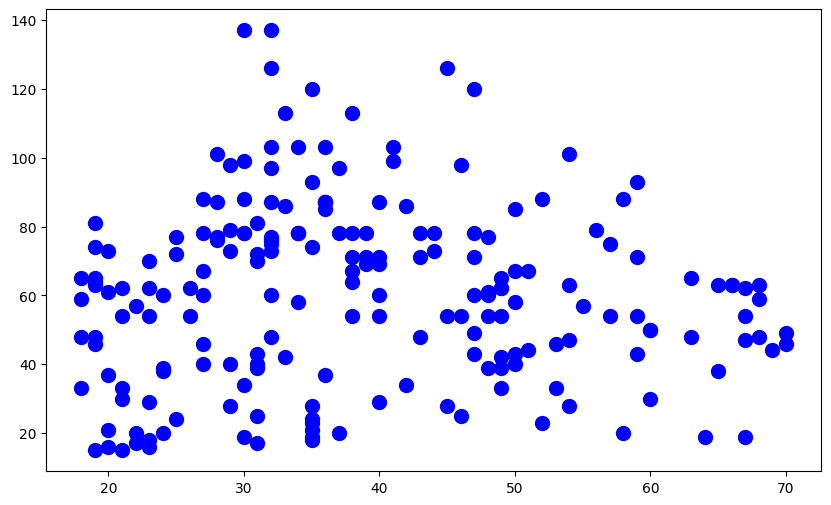

In [31]:
# Create a new figure with a specified size
plt.figure(figsize=(10,6))

# Scatter plot of 'Age' against 'Annual Income (k$)'
plt.scatter(df[['Age']],df[['Annual Income (k$)']],s=100,c='blue')

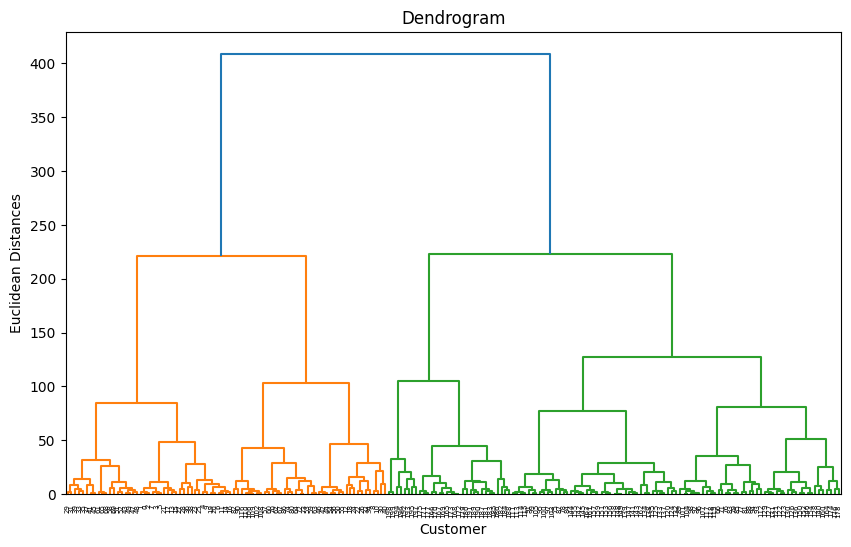

In [32]:
# Create a new figure with a specified size
plt.figure(figsize=(10,6))
# Generate the dendrogram using hierarchical clustering with the 'ward' m
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))

# Set the title and labels for the plot
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean Distances')
# Display the plot
plt.show()

#Check for largest distance vertically without crossing any horizontal line.

In [59]:

# Create an AgglomerativeClustering object with 2 clusters
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Fit the clustering model to the data and predict cluster labels for each data point
cl = cluster.fit_predict(df)

# Output the predicted cluster labels

cl

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [35]:
# Calculate the silhouette score
silhouette = silhouette_score(df, cl)
silhouette

0.4104652474372429

In [57]:
# Convert the DataFrame 'df' to a Numpy array
X = df.values
X

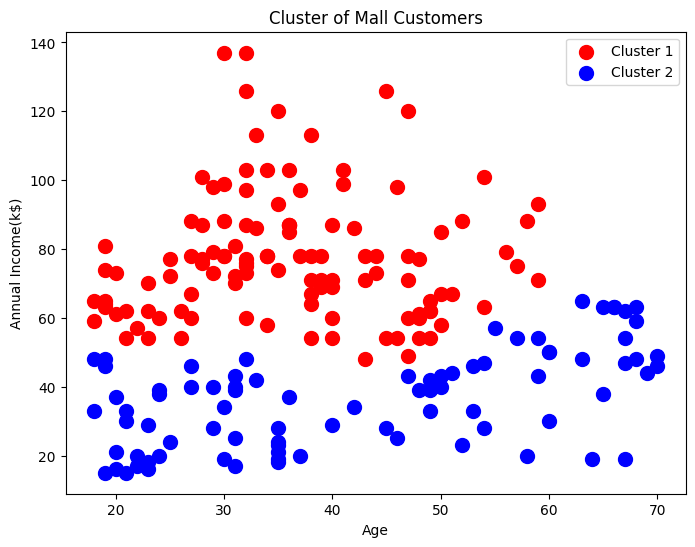

In [38]:
# Create a new figure with a specified size
plt.figure(figsize=(8, 6))
# Scatter plot for points in cluster 0
plt.scatter(X[cl==0, 0], X[cl==0, 1], s=100, c='red', label='Cluster 1')
# Scatter plot for points in cluster 1
plt.scatter(X[cl==1, 0], X[cl==1, 1], s=100, c='blue', label='Cluster 2')
# Set plot title and labels
plt.title('Cluster of Mall Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income(k$)')
# Show legend
plt.legend()
# Display the plot
plt.show()


## Silhouette Score is bad in previous Clustering so, we need to normalize the Age.

In [56]:
# Normalize the data in the Numpy array X
scaled = normalize(X)


In [41]:
# Convert the normalized data back to a pandas DataFrame
scaled = pd.DataFrame(scaled)
# Display the first few rows of the DataFrame scaled
scaled.head()


,0,1
0,0.784883,0.619644
1,0.813733,0.581238
2,0.780869,0.624695
3,0.820905,0.571064
4,0.876812,0.480833


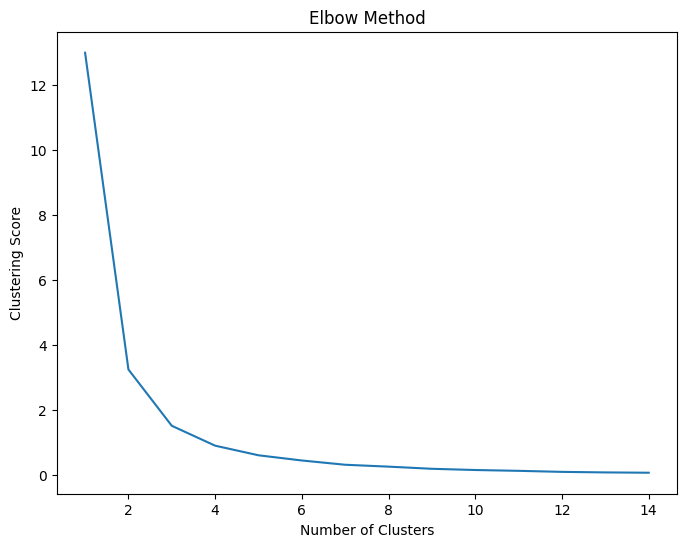

In [42]:
# Initialize an empty list to store the WCSS values
wcss = []
# Iterate over a range of cluster numbers from 1 to 14
for i in range(1, 15):
 # Create a KMeans object with 'i' clusters using random initializatio
 kmeans = KMeans(n_clusters=i, init='random', random_state=42)
 
 # Fit the KMeans model to the normalized data
 kmeans.fit(scaled)
 
 # Append the WCSS value to the list
 wcss.append(kmeans.inertia_)
# Create a new figure with a specified size
plt.figure(figsize=(8, 6))
# Plot the number of clusters against the corresponding WCSS values
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [43]:
# Create a KMeans object with 2 clusters and a fixed random state for rep
kmeans = KMeans(n_clusters=2, random_state=42)
# Fit the KMeans model to the normalized data
kmeans.fit(scaled)
# Predict cluster labels for each data point
pred = kmeans.predict(scaled)
# Display the predicted cluster labels
pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [61]:
# Calculate the new silhouette score
silhouette = silhouette_score(scaled, pred)
silhouette

0.642036722568442